In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
# Import class PolynomialFeatures.
from sklearn.preprocessing import PolynomialFeatures
# Import class LinearRegression.
from sklearn.linear_model import LinearRegression

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

In [2]:
# Sets the number of examples.
M = 20

np.random.seed(1012019)

# Create target function.
x1 = np.linspace(-3, 3, M)
y = 2 + x1 + 0.5*x1**2;
y_noisy = y + np.random.randn(M)

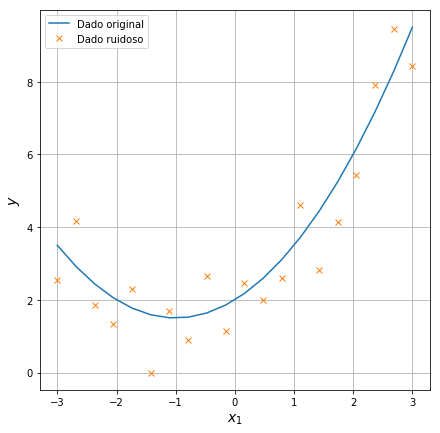

In [3]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

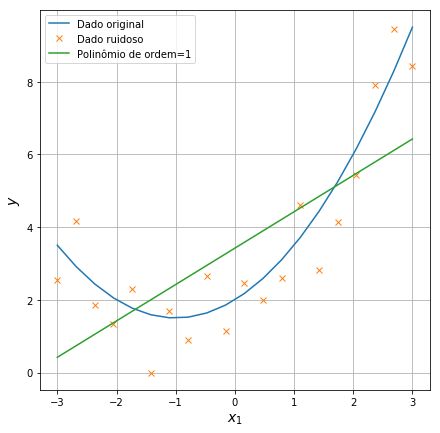

In [4]:
# Instantiate a degree 1 polynomial.
poly_features = PolynomialFeatures(degree=1, include_bias=True)

# Create transform a degree 1 polynomial.
X = np.c_[np.ones(M), x1]
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_noisy)

yp1 = lin_reg.predict(X_poly)

fig = plt.figure(figsize=(7,7))
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, yp1, label='Polinômio de ordem=1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("polinomio1.png", dpi=600)

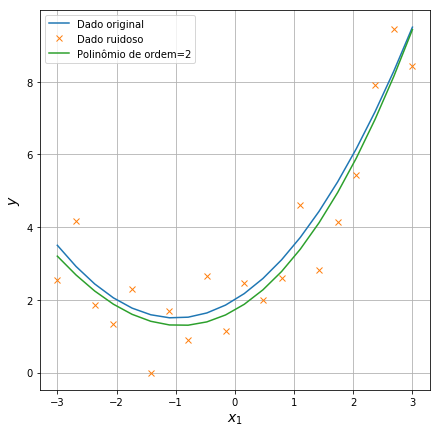

In [5]:
# Instantiate a degree 2 polynomial.
poly_features = PolynomialFeatures(degree=2, include_bias=True)

# Create transform a degree 2 polynomial.
X = np.c_[np.ones(M), x1, x1**2]
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_noisy)

yp2 = lin_reg.predict(X_poly)

fig = plt.figure(figsize=(7,7))
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, yp2, label='Polinômio de ordem=2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("polinomio2.png", dpi=600)

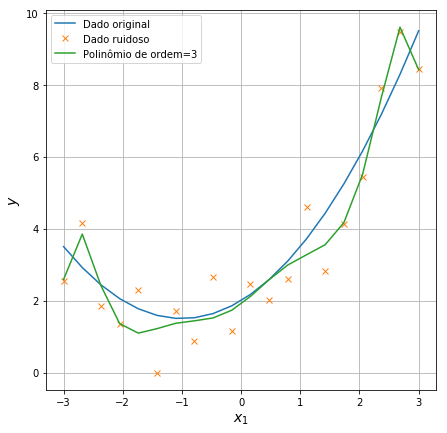

In [6]:
# Instantiate a degree 3 polynomial.
poly_features = PolynomialFeatures(degree=3, include_bias=True)

# Create transform a degree 3 polynomial.
X = np.c_[np.ones(M), x1, x1**2, x1**3]
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_noisy)

yp3 = lin_reg.predict(X_poly)

fig = plt.figure(figsize=(7,7))
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, yp3, label='Polinômio de ordem=3')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("polinomio3.png", dpi=600)

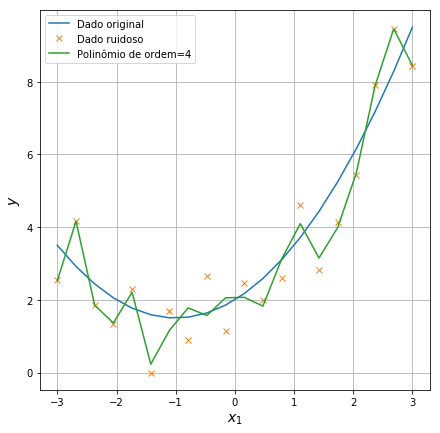

In [7]:
# Instantiate a degree 4 polynomial.
poly_features = PolynomialFeatures(degree=4, include_bias=True)

# Create transform a degree 4 polynomial.
X = np.c_[np.ones(M), x1, x1**2, x1**3, x1**4]
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_noisy)

yp4 = lin_reg.predict(X_poly)

fig = plt.figure(figsize=(7,7))
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, yp4, label='Polinômio de ordem=4')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("polinomio4.png", dpi=600)

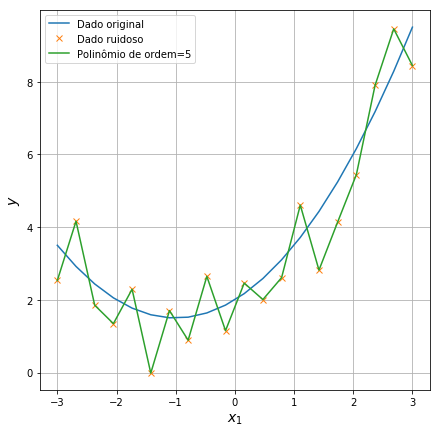

In [8]:
# Instantiate a degree 5 polynomial.
poly_features = PolynomialFeatures(degree=5, include_bias=True)

# Create transform a degree 5 polynomial.
X = np.c_[np.ones(M), x1, x1**2, x1**3, x1**4, x1**5]
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_noisy)

yp5 = lin_reg.predict(X_poly)

fig = plt.figure(figsize=(7,7))
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, yp5, label='Polinômio de ordem=5')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()

plt.savefig("polinomio5.png", dpi=600)

In [9]:
from sklearn.metrics import mean_squared_error
import math

# Instantiate a degree 1 polynomial.
poly_featurest = PolynomialFeatures(degree=1, include_bias=True)
poly_featuresv = PolynomialFeatures(degree=1, include_bias=True)

error_training = []
error_validation = []
for M in range(2,600,2):
    # Create target function.
    x1t = np.linspace(-3, 3, M)
    yt = 2 + x1t + 0.5*x1t**2;
    y_noisyt = yt + np.random.randn(M)    
    
    # Create transform a degree 1 polynomial.
    Xt = np.c_[np.ones(M), x1t]
    X_polyt = poly_featurest.fit_transform(Xt)

    lin_regt = LinearRegression()
    lin_regt.fit(X_polyt, y_noisyt)

    ypt = lin_regt.predict(X_polyt)
    
    error_training.append(mean_squared_error(yt, ypt))
    
    m = math.ceil(M*0.2)
    x1v = np.linspace(-3, 3, m)
    yv = 2 + x1v + 0.5*x1v**2;
    np.random.seed(M)
    y_noisyv = yv + np.random.randn(m)    
    
    # Create transform a degree 1 polynomial.
    Xv = np.c_[np.ones(m), x1v]
    X_polyv = poly_featuresv.fit_transform(Xv)
    
    ypv = lin_regt.predict(X_polyv)
    
    error_validation.append(mean_squared_error(yv, ypv))

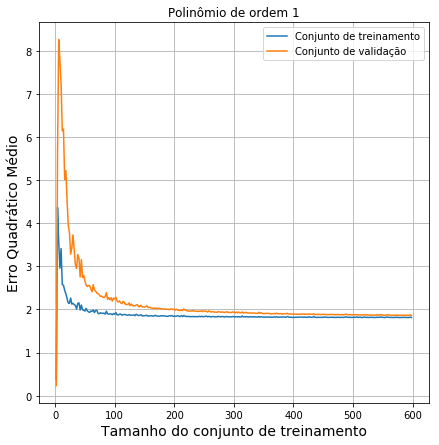

In [10]:
fig = plt.figure(figsize=(7,7))
plt.plot(range(2,600,2), error_training, label='Conjunto de treinamento')
plt.plot(range(2,600,2), error_validation, label='Conjunto de validação')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
plt.title('Polinômio de ordem 1')
plt.legend()

In [11]:
# Instantiate a degree 2 polynomial.
poly_featurest = PolynomialFeatures(degree=2, include_bias=True)
poly_featuresv = PolynomialFeatures(degree=2, include_bias=True)

error_training = []
error_validation = []
for M in range(2,600,2):
    # Create target function.
    x1t = np.linspace(-3, 3, M)
    yt = 2 + x1t + 0.5*x1t**2;
    y_noisyt = yt + np.random.randn(M)    
    
    # Create transform a degree 2 polynomial.
    Xt = np.c_[np.ones(M), x1t, x1t**2]
    X_polyt = poly_featurest.fit_transform(Xt)

    lin_regt = LinearRegression()
    lin_regt.fit(X_polyt, y_noisyt)

    ypt = lin_regt.predict(X_polyt)
    
    error_training.append(mean_squared_error(yt, ypt))
    
    m = math.ceil(M*0.2)
    x1v = np.linspace(-3, 3, m)
    yv = 2 + x1v + 0.5*x1v**2;
    np.random.seed(M)
    y_noisyv = yv + np.random.randn(m)    
    
    # Create transform a degree 2 polynomial.
    Xv = np.c_[np.ones(m), x1v, x1v**2]
    X_polyv = poly_featuresv.fit_transform(Xv)
    
    ypv = lin_regt.predict(X_polyv)
    
    error_validation.append(mean_squared_error(yv, ypv))

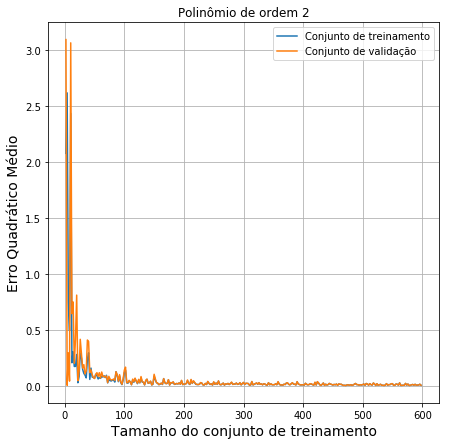

In [12]:
fig = plt.figure(figsize=(7,7))
plt.plot(range(2,600,2), error_training, label='Conjunto de treinamento')
plt.plot(range(2,600,2), error_validation, label='Conjunto de validação')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
plt.title('Polinômio de ordem 2')
plt.legend()

In [13]:
# Instantiate a degree 3 polynomial.
poly_featurest = PolynomialFeatures(degree=3, include_bias=True)
poly_featuresv = PolynomialFeatures(degree=3, include_bias=True)

error_training = []
error_validation = []
for M in range(2,600,2):
    # Create target function.
    x1t = np.linspace(-3, 3, M)
    yt = 2 + x1t + 0.5*x1t**2;
    y_noisyt = yt + np.random.randn(M)    
    
    # Create transform a degree 3 polynomial.
    Xt = np.c_[np.ones(M), x1t, x1t**2, x1t**3]
    X_polyt = poly_featurest.fit_transform(Xt)

    lin_regt = LinearRegression()
    lin_regt.fit(X_polyt, y_noisyt)

    ypt = lin_regt.predict(X_polyt)
    
    error_training.append(mean_squared_error(yt, ypt))
    
    m = math.ceil(M*0.2)
    x1v = np.linspace(-3, 3, m)
    yv = 2 + x1v + 0.5*x1v**2;
    np.random.seed(M)
    y_noisyv = yv + np.random.randn(m)    
    
    # Create transform a degree 2 polynomial.
    Xv = np.c_[np.ones(m), x1v, x1v**2, x1v**3]
    X_polyv = poly_featuresv.fit_transform(Xv)
    
    ypv = lin_regt.predict(X_polyv)
    
    error_validation.append(mean_squared_error(yv, ypv))

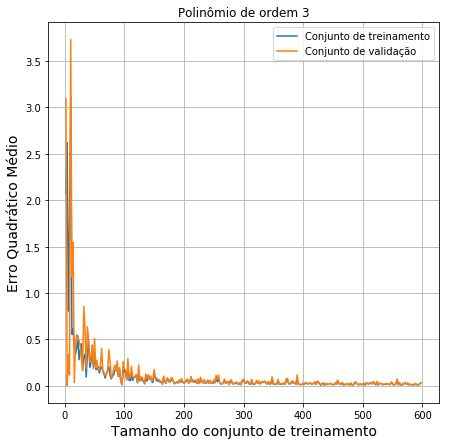

In [14]:
fig = plt.figure(figsize=(7,7))
plt.plot(range(2,600,2), error_training, label='Conjunto de treinamento')
plt.plot(range(2,600,2), error_validation, label='Conjunto de validação')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
plt.title('Polinômio de ordem 3')
plt.legend()

In [15]:
# Instantiate a degree 5 polynomial.
poly_featurest = PolynomialFeatures(degree=5, include_bias=True)
poly_featuresv = PolynomialFeatures(degree=5, include_bias=True)

error_training = []
error_validation = []
for M in range(2,600,2):
    # Create target function.
    x1t = np.linspace(-3, 3, M)
    yt = 2 + x1t + 0.5*x1t**2;
    y_noisyt = yt + np.random.randn(M)    
    
    # Create transform a degree 5 polynomial.
    Xt = np.c_[np.ones(M), x1t, x1t**2, x1t**3, x1t**4, x1t**5]
    X_polyt = poly_featurest.fit_transform(Xt)

    lin_regt = LinearRegression()
    lin_regt.fit(X_polyt, y_noisyt)

    ypt = lin_regt.predict(X_polyt)
    
    error_training.append(mean_squared_error(yt, ypt))
    
    m = math.ceil(M*0.2)
    x1v = np.linspace(-3, 3, m)
    yv = 2 + x1v + 0.5*x1v**2;
    np.random.seed(M)
    y_noisyv = yv + np.random.randn(m)    
    
    # Create transform a degree 5 polynomial.
    Xv = np.c_[np.ones(m), x1v, x1v**2, x1v**3, x1v**4, x1v**5]
    X_polyv = poly_featuresv.fit_transform(Xv)
    
    ypv = lin_regt.predict(X_polyv)
    
    error_validation.append(mean_squared_error(yv, ypv))

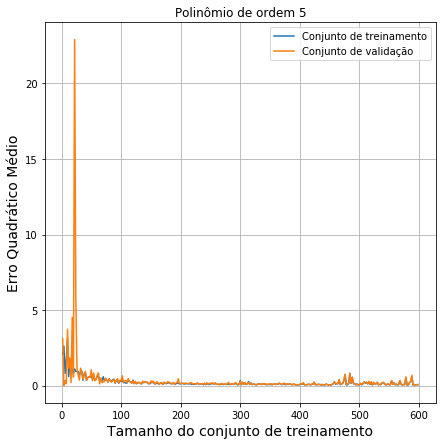

In [16]:
fig = plt.figure(figsize=(7,7))
plt.plot(range(2,600,2), error_training, label='Conjunto de treinamento')
plt.plot(range(2,600,2), error_validation, label='Conjunto de validação')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
plt.title('Polinômio de ordem 5')
plt.legend()